In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Importing data from the excel

In [250]:
data=pd.read_csv("startup.csv")

In [251]:
data


,Unnamed: 0,Company,Cities,Year of starting,FOUNDERS,Industries,Funding amount,Funding rounds,No of employees,No of investors
0,0,) Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Apps,"445,920,356",Number of funding rounds: 12,1001-5000,Number of investors: 16
1,1,) Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...",B2B,"89,506,451",Number of funding rounds: 10,101-250,Number of investors: 20
2,2,) Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",E-Commerce,"32,448,851",Number of funding rounds: 4,501-1000,Number of investors: 4
3,3,) Apna,Mumbai,2019,Nirmit Parikh,Employment,"93,450,000",Number of funding rounds: 4,101-250,Number of investors: 6
4,4,) Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",Financial,"366,600,000",Number of funding rounds: 7,1001-5000,Number of investors: 29
...,...,...,...,...,...,...,...,...,...,...
272,272,) Hopscotch,Mumbai,2011,Bhanu Chopra,E-Commerce,"554,629,632",Number of funding rounds: 5,101-250,Number of investors: 4
273,273,) Setu,Bengaluru,2018,"Ganesh Krishnamoorthy, Milap Shah, Rahul Jain,...",Financial,"1,179,919",Number of funding rounds: 2,1001-5000,Number of investors: 4
274,274,) Blue Tokai Coffee Roasters,Delhi,2012,"Tarun Sharma, Vikas Lachhwani",Consumer,"15,000,000",Number of funding rounds: 3,101-250,Number of investors: 2
275,275,) Avanse Financial Services,Mumbai,2012,"Nitin Saluja, Raghav Verma",Education,"6,065,079",Number of funding rounds: 3,11-50,Number of investors: 3


# Data Cleaning

In [252]:
data=data.drop(["Unnamed: 0"],axis=1)

In [253]:
data.head()

,Company,Cities,Year of starting,FOUNDERS,Industries,Funding amount,Funding rounds,No of employees,No of investors
0,) Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Apps,"445,920,356",Number of funding rounds: 12,1001-5000,Number of investors: 16
1,) Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...",B2B,"89,506,451",Number of funding rounds: 10,101-250,Number of investors: 20
2,) Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",E-Commerce,"32,448,851",Number of funding rounds: 4,501-1000,Number of investors: 4
3,) Apna,Mumbai,2019,Nirmit Parikh,Employment,"93,450,000",Number of funding rounds: 4,101-250,Number of investors: 6
4,) Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",Financial,"366,600,000",Number of funding rounds: 7,1001-5000,Number of investors: 29


In [32]:
#cleaning special characters from the data like "),..."

#changing No-of employees to maximum no of employees to minimum no of employees

#removing "[Number-of-funding-rounds],[Number-of-investors]

#for more understanding of data i had changed founders to no-of-founders for further visualizing


In [254]:
data["Company"]=data["Company"].apply(lambda x: pd.Series(str(x).split(")")))[1]

In [255]:
data["No of Founders"]=data["FOUNDERS"].apply(lambda x: len(pd.Series(str(x).split(","))))

In [256]:
data=data.drop("FOUNDERS",axis=1)

In [257]:
data["Funding amount"]=data["Funding amount"].apply(lambda x: x.replace(",",""))


In [258]:
data["Funding rounds"]=data["Funding rounds"].apply(lambda x: pd.Series(str(x).split(":")))[1]
data["No of investors"]=data["No of investors"].apply(lambda x: pd.Series(str(x).split(":")))[1]

In [259]:
data[["Minimum no of employees","Maximum no of employees"]]=data["No of employees"].apply(lambda x:pd.Series(str(x).split("-")))


In [260]:
data=data.drop(["No of employees"],axis=1)

In [261]:
data.head()

,Company,Cities,Year of starting,Industries,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees
0,Urban Company,Gurgaon,2014,Apps,445920356,12,16,3,1001,5000
1,Classplus,Noida,2018,B2B,89506451,10,20,5,101,250
2,Paytm,Noida,2010,E-Commerce,32448851,4,4,2,501,1000
3,Apna,Mumbai,2019,Employment,93450000,4,6,1,101,250
4,Razorpay,Bengaluru,2014,Financial,366600000,7,29,2,1001,5000


In [262]:
# Now finding null values present in the dataset
# -is na()
# -is null()

data.isna().sum()

Company                    0
Cities                     0
Year of starting           0
Industries                 0
Funding amount             0
Funding rounds             0
No of investors            0
No of Founders             0
Minimum no of employees    0
Maximum no of employees    0
dtype: int64

In [263]:
data.isnull().sum()

Company                    0
Cities                     0
Year of starting           0
Industries                 0
Funding amount             0
Funding rounds             0
No of investors            0
No of Founders             0
Minimum no of employees    0
Maximum no of employees    0
dtype: int64

In [264]:
## find any duplicate value present in the data

In [265]:
data[data.duplicated()] 

,Company,Cities,Year of starting,Industries,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees


# Data Manupulating

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  277 non-null    object
 1   Cities                   277 non-null    object
 2   Year of starting         277 non-null    int64 
 3   Industries               277 non-null    object
 4   Funding amount           277 non-null    object
 5   Funding rounds           277 non-null    object
 6   No of investors          277 non-null    object
 7   No of Founders           277 non-null    int64 
 8   Minimum no of employees  277 non-null    object
 9   Maximum no of employees  277 non-null    object
dtypes: int64(2), object(8)
memory usage: 21.8+ KB


In [268]:
convert_type={"Funding amount":int,"Funding rounds":int,"No of investors":int,"Minimum no of employees":int,"Maximum no of employees":int}
data=data.astype(convert_type)

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  277 non-null    object
 1   Cities                   277 non-null    object
 2   Year of starting         277 non-null    int64 
 3   Industries               277 non-null    object
 4   Funding amount           277 non-null    int32 
 5   Funding rounds           277 non-null    int32 
 6   No of investors          277 non-null    int32 
 7   No of Founders           277 non-null    int64 
 8   Minimum no of employees  277 non-null    int32 
 9   Maximum no of employees  277 non-null    int32 
dtypes: int32(5), int64(2), object(3)
memory usage: 16.4+ KB


In [270]:
data.describe()

,Year of starting,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees
count,277.000000,2.770000e+02,277.000000,277.000000,277.000000,277.000000,277.000000
mean,2013.433213,9.762388e+07,6.129964,10.790614,2.386282,413.563177,1307.184116
std,5.042578,1.430760e+08,4.307611,7.587140,1.312796,814.028006,2212.724732
min,1984.000000,1.119863e+06,1.000000,1.000000,1.000000,1.000000,10.000000
25%,2012.000000,1.434030e+07,3.000000,5.000000,2.000000,51.000000,100.000000
50%,2015.000000,3.799669e+07,5.000000,9.000000,2.000000,101.000000,250.000000
75%,2016.000000,1.150000e+08,8.000000,14.000000,3.000000,501.000000,1000.000000
max,2020.000000,8.248300e+08,25.000000,45.000000,12.000000,5001.000000,10000.000000


# 1.Univarient Analysis

In [271]:
data.head(10)

,Company,Cities,Year of starting,Industries,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees
0,Urban Company,Gurgaon,2014,Apps,445920356,12,16,3,1001,5000
1,Classplus,Noida,2018,B2B,89506451,10,20,5,101,250
2,Paytm,Noida,2010,E-Commerce,32448851,4,4,2,501,1000
3,Apna,Mumbai,2019,Employment,93450000,4,6,1,101,250
4,Razorpay,Bengaluru,2014,Financial,366600000,7,29,2,1001,5000
5,UpGrad,Mumbai,2015,E-Learning,176283446,4,4,4,1001,5000
6,Delhivery,Gurgaon,2011,E-Commerce,1236569,11,13,5,5001,10000
7,1mg,Gurgaon,2015,Delivery,204600209,16,17,5,11,50
8,BigBasket,Bengaluru,2011,Delivery,1119863,17,17,5,5001,10000
9,GoMechanic,Gurgaon,2016,Automotive,59849371,8,9,5,251,500


# 1.1 Finding repeating years

In [272]:
data["Year of starting"].value_counts()

2015    59
2017    27
2016    25
2012    22
2014    21
2011    21
2019    19
2018    17
2013    14
2010    11
2008     7
2007     6
2006     5
2020     5
2009     5
2000     4
1996     1
1995     1
1998     1
1989     1
1999     1
2001     1
1984     1
1990     1
2004     1
Name: Year of starting, dtype: int64

# counting the repeating years

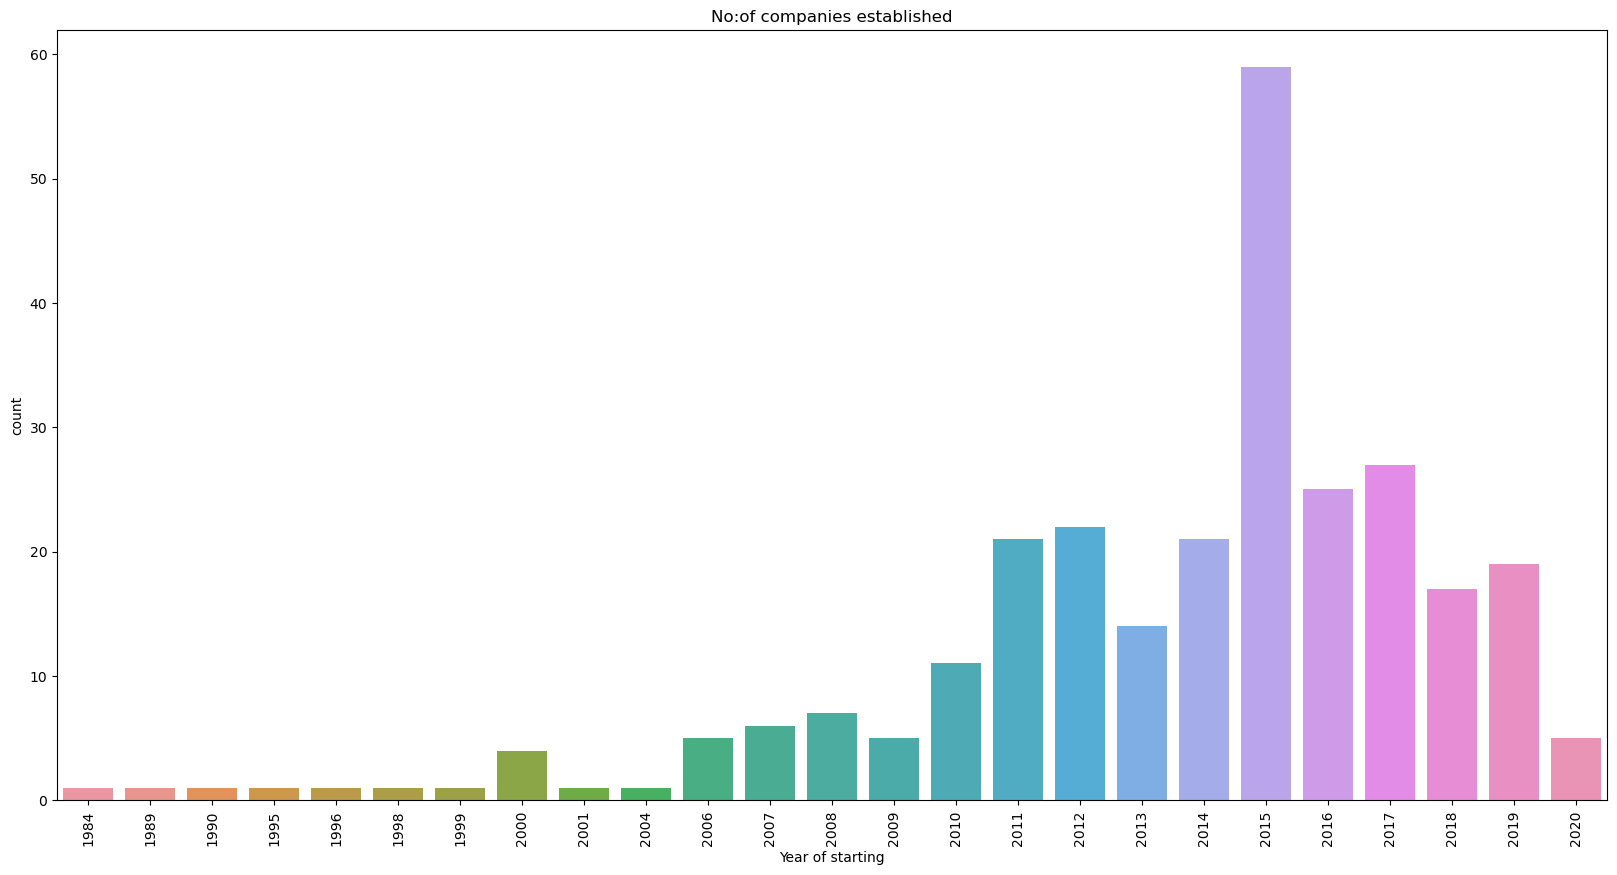

In [273]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Year of starting',data= data)
plt.title ('No:of companies established')
plt.xticks(rotation = 90)
plt.show()

# 1.2 how much percentage of companies having more number of founders

In [280]:
data.columns

Index(['Company', 'Cities', 'Year of starting', 'Industries', 'Funding amount',
       'Funding rounds', 'No of investors', 'No of Founders',
       'Minimum no of employees', 'Maximum no of employees'],
      dtype='object')

In [283]:
x=data["No of Founders"].value_counts()[:5]
x

2    108
1     66
3     63
4     24
5     11
Name: No of Founders, dtype: int64

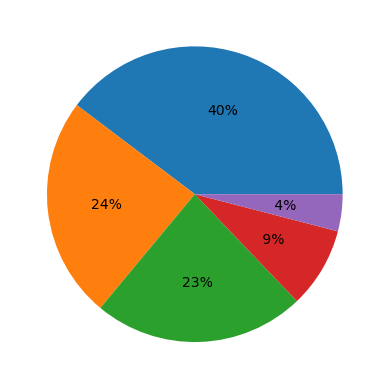

In [284]:
plt.pie(x,autopct="%2.0f%%")
plt.show()

# 1.3 which city has more number of companies

Text(0.5, 1.0, 'More no of companies')

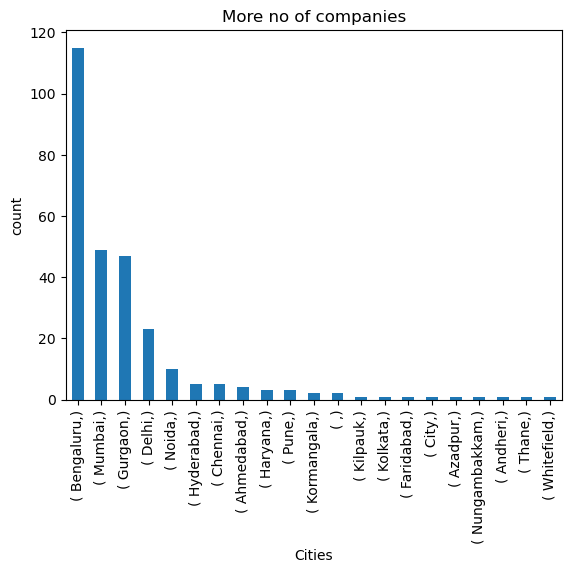

In [419]:
z=data[["Cities"]].value_counts().plot(kind="bar")
z.set_ylabel("count")
z.set_title("More no of companies")

# 2 Bi-variant Analysis

# 2.1 a)which city has more no of  Companies  working in industries of delivery

In [366]:
v=data[data["Industries"]=="Delivery"]



In [360]:
b=v.groupby("Industries")

Text(0.5, 1.0, 'city having more industries in delivery')

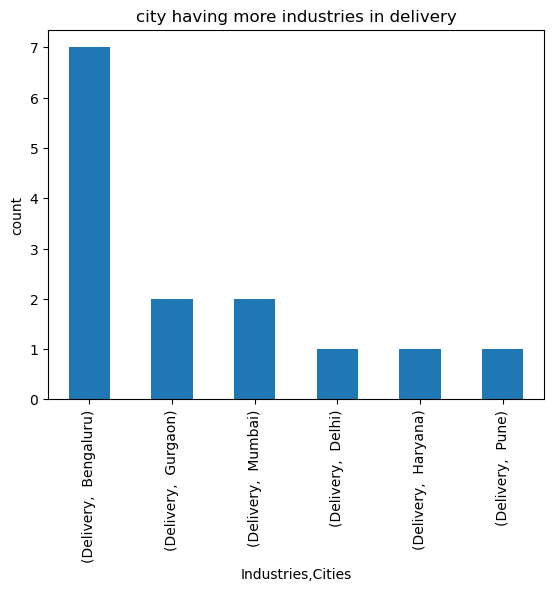

In [421]:
j=b[["Cities"]].value_counts().plot(kind="bar")
j.set_ylabel("count")
j.set_title("city having more industries in delivery")

# 2.1 b) Which city and company having industry as delivery

Text(0.5, 1.0, 'city and company in delivery industry')

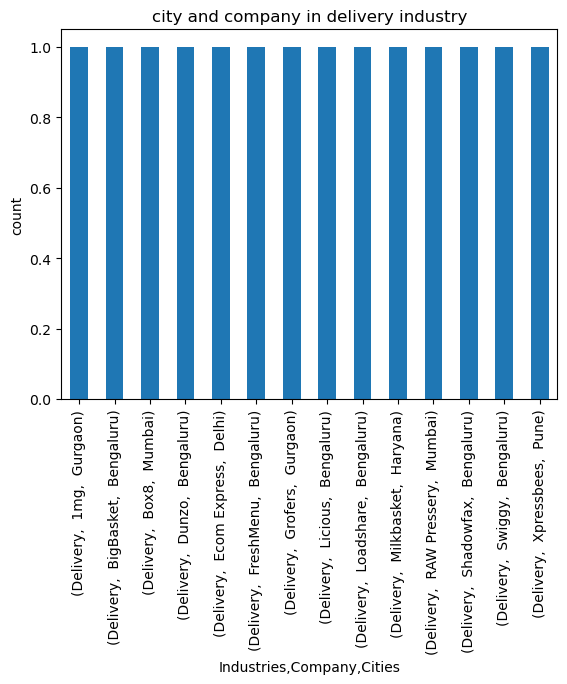

In [422]:
kj=b[["Company","Cities","Industries"]].value_counts().plot(kind="bar")
kj.set_ylabel("count")
kj.set_title("city and company in delivery industry")

# 2.2)In which year more no of companies are established

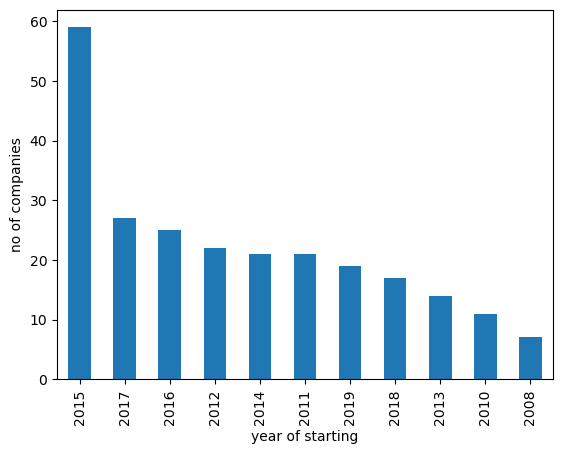

In [376]:
top=data["Year of starting"].value_counts()[:11]
top.plot(kind="bar")
plt.xlabel("year of starting")
plt.ylabel("no of companies")
plt.show()

In [394]:
pip install bar-chart-race

     -------------------------------------- 156.8/156.8 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [395]:
from openpyxl import load_workbook
import bar_chart_race as bcr
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

# 2.3 which company has more number of funding rounds

In [397]:
fundingsort=data.sort_values(by="Funding rounds",ascending=False)
fundingsort

,Company,Cities,Year of starting,Industries,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees
11,Ola,Kormangala,2010,Apps,3808672,25,45,2,5001,10000
41,Flipkart,Bengaluru,2007,E-Commerce,165518505,24,24,2,51,100
113,Aye Finance,Gurgaon,2014,Finance,10392793,23,23,2,251,500
107,Zomato,Gurgaon,2008,Food,14340302,21,25,2,501,1000
181,VerSe Innovation,Bengaluru,2007,Content,17612830,20,10,1,1001,5000
...,...,...,...,...,...,...,...,...,...,...
177,Digital Class E-Learning Marketplace,Ahmedabad,2017,B2B,44247827,1,19,2,1001,5000
229,Magicbricks,Noida,2006,Commercial,824830000,1,13,3,251,500
259,InstantPay,Delhi,2013,E-Commerce,22685276,1,4,1,1001,5000
227,Amber Group,Gurgaon,1990,Consumer,317695079,1,6,2,501,1000


In [402]:
trace=go.Scatter(x=fundingsort["Company"],
                y=fundingsort["Funding rounds"],
                name="Funding rounds in start up companies",
                line=dict(color="black"),
                opacity=0.6)
layout=dict(title="Funding rounds in start up companies",
             width=1900,
             height=410,
             xaxis_title="companies",
             yaxis_title="funding rounds",
             legend=dict(
                  yanchor="top",
                  y=0.99,
                  xanchor="left",
                  x=0.01)
           )
fig=dict(data=[trace],
        layout=layout)
iplot(fig)


# 2.4 which company has more number of investors

In [403]:
investmentsort=data.sort_values(by="No of investors",ascending=False)
investmentsort

,Company,Cities,Year of starting,Industries,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees
11,Ola,Kormangala,2010,Apps,3808672,25,45,2,5001,10000
23,BYJU,Bengaluru,2011,E-Learning,2745964,18,38,2,251,500
50,ZoomCar,Bengaluru,2012,Automotive,1776260,20,36,2,1001,5000
10,Unacademy,Bengaluru,2015,E-Learning,398500000,11,36,4,251,500
32,Reliance Jio,Mumbai,2010,Apps,24767620,16,35,1,11,50
...,...,...,...,...,...,...,...,...,...,...
228,Star Health and Allied Insurance,Nungambakkam,2006,Health,5100000,3,1,3,101,250
264,FreshMenu,Bengaluru,2014,Delivery,40833000,7,1,1,251,500
139,Lava International Limited,Noida,2009,Consumer,2428380,1,1,3,101,250
198,LocoNav,Azadpur,2015,Computer,48598636,3,1,3,11,50


In [404]:
trace=go.Scatter(x=investmentsort["Company"],
                y=investmentsort["No of investors"],
                name="No of investors in start up companies",
                line=dict(color="black"),
                opacity=0.6)
layout=dict(title="Investors in start up companies",
             width=1900,
             height=410,
             xaxis_title="companies",
             yaxis_title="No of investors",
             legend=dict(
                  yanchor="top",
                  y=0.99,
                  xanchor="left",
                  x=0.01)
           )
fig=dict(data=[trace],
        layout=layout)
iplot(fig)

# 2.5 which city gives more no of investors

In [408]:
xx=pd.pivot_table(data,values="No of investors",index="Cities",aggfunc=max)
bb=xx.sort_values(by="No of investors",ascending=False)
bb

,No of investors
Cities,
Kormangala,45
Bengaluru,38
Mumbai,35
Gurgaon,26
Noida,20
Ahmedabad,19
Pune,19
Haryana,18
Chennai,17


Text(0.5, 1.0, 'cities more no of investors')

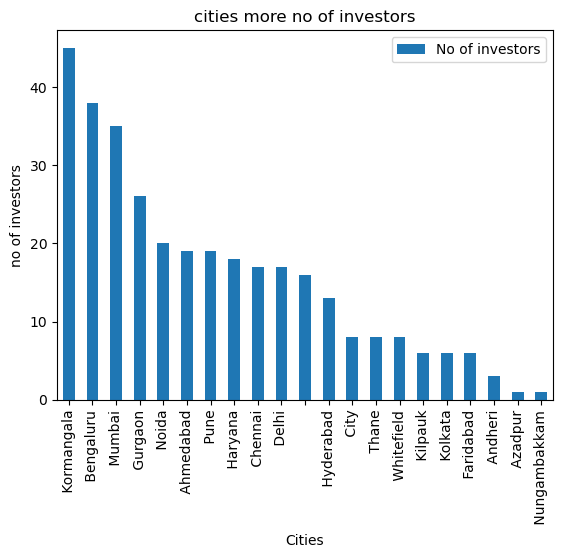

In [423]:
bvb=bb.plot(kind="bar")
bvb.set_ylabel("no of investors")
bvb.set_title("cities more no of investors")

# 3.Multivariant Analysis

Finding the corellation between completed data

In [410]:
data.corr()

,Year of starting,Funding amount,Funding rounds,No of investors,No of Founders,Minimum no of employees,Maximum no of employees
Year of starting,1.000000,-0.050284,-0.175075,0.037230,0.146488,-0.053399,-0.021705
Funding amount,-0.050284,1.000000,0.074495,0.158478,-0.000927,-0.049090,-0.005960
Funding rounds,-0.175075,0.074495,1.000000,0.541502,0.029532,0.144945,0.132900
No of investors,0.037230,0.158478,0.541502,1.000000,0.120916,0.107971,0.084671
No of Founders,0.146488,-0.000927,0.029532,0.120916,1.000000,0.003546,0.011639
Minimum no of employees,-0.053399,-0.049090,0.144945,0.107971,0.003546,1.000000,0.885102
Maximum no of employees,-0.021705,-0.005960,0.132900,0.084671,0.011639,0.885102,1.000000


<AxesSubplot:>

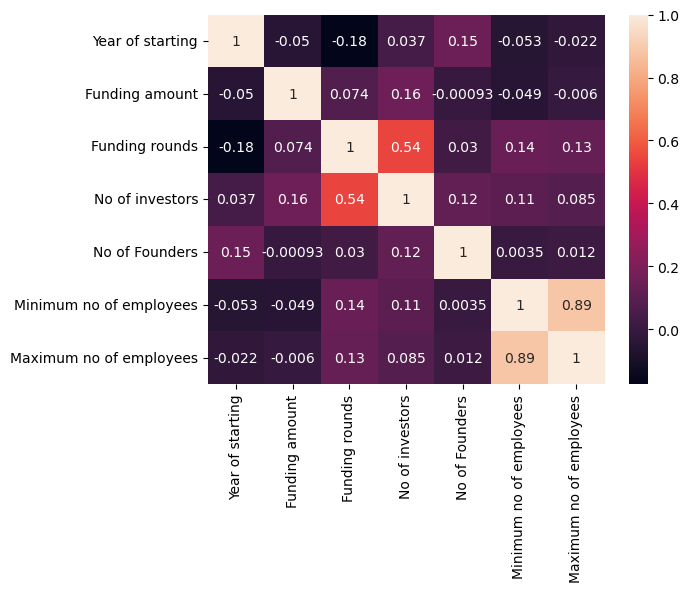

In [411]:
sns.heatmap(data.corr(),annot=True)